# use case:-------

### The Problem statement:


The goal here is to find the chance of admission of a candidate based on his/her GRE Score (out of 340), 
TOEFL Score (out of 120), rating of the University (out of 5) in which he/she is trying to get admission, 
Strength of the SOP (out of 5),strength of the Letter Of Recommendation (out of 5), CGPA (out of 10) and
the research experience (0 or 1).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
df=pd.read_csv("Admission_Prediction.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
df.shape
#9 columns 
#5000 rows 

(500, 9)

In [5]:
df.info()
#gives summary of data 

#see here gre score have 15 null values
#toefl---have 10 null values 

#we can see where null values there in our data like this 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            485 non-null float64
TOEFL Score          490 non-null float64
University Rating    485 non-null float64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(7), int64(2)
memory usage: 35.2 KB


In [6]:
df.isna()
#where null iis there gives true 
#we can use isnull() also to get same 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,True,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [7]:
df.isna().sum()
#it will give sum of null values

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

# now do preprocessing----impute or fill the null values---this is to fill missing data
# we have different imputation methods like mean,median,mode....etc

In [8]:
print(df['GRE Score'].mode())
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace=True)

#we filled first most repeated value in data set

0    312.0
1    324.0
dtype: float64


In [9]:
print(df['TOEFL Score'].mode())
#here most repeated is 110 so will fill this 

df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0],inplace=True)

0    110.0
dtype: float64


In [10]:
df['University Rating']
#here we can use mean also 
#any imputation we can use no problem
df['University Rating'].fillna(df['University Rating'].mean(),inplace=True)

In [11]:
df.isna().sum()

#see here no null values in data set 

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# we are removing not useful columns 

In [12]:
x=df.drop(['Serial No.','Chance of Admit'],axis=1)
#axis 1 means columns 

In [13]:
y=df['Chance of Admit']


# now we have x and y so we can do supervised learning 
# now we have features and label 


In [14]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


In [15]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

# why visualization is importent


# to understand data and which algorithm to use 
# based on feature vs label ---we can say that feature is importent or not ---if not imp we can delete thet feature 
# by seeing feature vs label we can understand there is relation or notb 


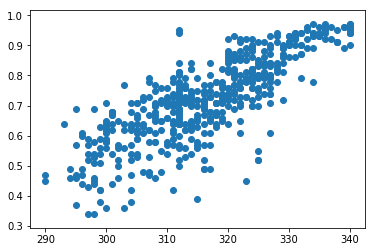

In [16]:


plt.scatter(x['GRE Score'],y)

#we can see there is a linear relation between them

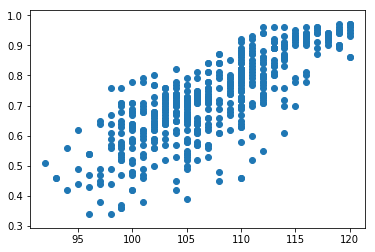

In [17]:
plt.scatter(x['TOEFL Score'],y)

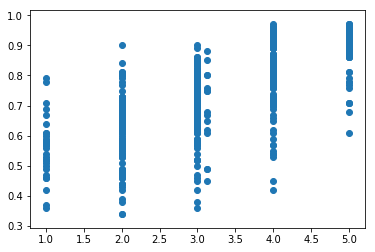

In [18]:
plt.scatter(x['University Rating'],y)


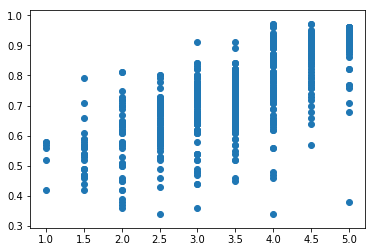

In [19]:
plt.scatter(x['SOP'],y)


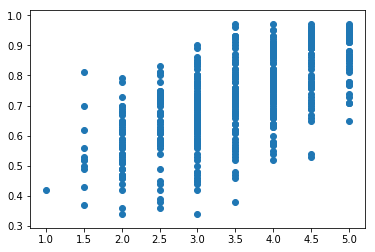

In [20]:
plt.scatter(x['LOR'],y)

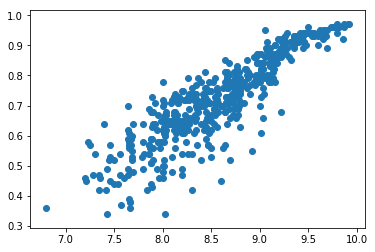

In [21]:
plt.scatter(x['CGPA'],y)

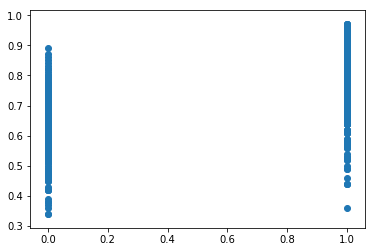

In [22]:
plt.scatter(x['Research'],y)

# here we have all features there is a relation between feature vs label
# so we are not deleting any feature ----if we have any non relation we can delete

# Scaling

# doing large scale to small scale 
# standard scale --normalization to standard normalization

In [17]:
from sklearn.preprocessing import StandardScaler
scaler_feature=StandardScaler()
scaler_label=StandardScaler()
scaled_data=scaler_feature.fit_transform(x)
scaled_data


#here scaling by z score standard normalization
#one array is one feature here 
#6 arrays means 6 features 
#uses ---large scale data to small scale 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.85052822,  1.77547686,  0.77890565, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.68147064, -0.04027672,  0.77890565, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.39765943, -0.53548224, -0.1078766 , ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.22103568,  2.10561387,  1.66568791, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39765943, -0.70055074,  0.77890565, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.95125316,  0.95013432,  0.77890565, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [18]:
#we are not using here scaled data

from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=100)

#here random state means ----randomly selecting same data every time cz will get same accrucy every time if we give same input 
#train ---will get m,c values as output
#we can test with train


In [21]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(train_x,train_y)

#importing linear regression from linear model
#model building orr fitting or line comming here 
#now we know m,c values ---by using this we can predict or test the data


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:

from sklearn.metrics import r2_score
score=r2_score(reg.predict(test_x),test_y)
score


#using r2_score we r predicting 
#by changing hyper meter will get different accuracy based on randomness selecting or test percentage




0.8076993525686706

In [25]:
reg.predict(train_x)

#this is our predictred values in x 

array([0.71956797, 0.57536274, 0.84346394, 0.58983333, 0.63473172,
       0.73005403, 0.97198723, 0.70406516, 0.82172776, 0.66397184,
       0.83330594, 0.77452862, 0.5118785 , 0.67707441, 0.60763399,
       0.44987991, 0.9348608 , 0.87334197, 0.54469491, 0.81371106,
       0.6829347 , 0.87782989, 0.80658782, 0.76499247, 0.59878914,
       0.76653532, 0.49701672, 0.55341765, 0.50984657, 0.73633258,
       0.49920606, 0.5182327 , 0.63821042, 0.74782526, 0.59364908,
       0.86697998, 0.90871365, 0.75418095, 0.53107959, 0.88319298,
       0.96181145, 0.86338281, 0.9354685 , 0.73012642, 0.78373604,
       0.81840994, 0.61883647, 0.90450042, 0.64553279, 0.50127825,
       0.769575  , 0.49004978, 0.82497279, 0.78951651, 0.73663239,
       0.61497307, 0.5521851 , 0.9115441 , 0.85474346, 0.67761833,
       0.69080401, 0.85203817, 0.75247039, 0.79478015, 0.85715163,
       0.65021665, 0.5759652 , 0.66880688, 0.71464843, 0.71676887,
       0.6626769 , 0.59248813, 0.72160629, 0.76451819, 0.70269

In [26]:
reg.predict(test_x)

array([0.85868396, 0.47100161, 0.6280096 , 0.44578053, 0.64598598,
       0.85398867, 0.58423805, 0.6708053 , 0.81576593, 0.68391898,
       0.66322789, 0.60710496, 0.89390747, 0.76122405, 0.63653857,
       0.50101692, 0.5932031 , 0.74550918, 0.56026094, 0.71477719,
       0.89825968, 0.60985982, 0.85096431, 0.82326697, 0.99808338,
       0.60354515, 0.68321824, 0.93662411, 0.87713203, 0.70043558,
       0.78420399, 0.85380635, 0.7502154 , 0.55268936, 0.73961435,
       0.78262859, 0.79567973, 0.57756558, 0.54007331, 0.70184561,
       0.94815906, 0.58454502, 0.83942492, 0.78608391, 0.8110905 ,
       0.54729563, 0.59557674, 0.87410501, 0.95154098, 0.59880994,
       0.81659257, 0.70920574, 0.80814867, 0.99084397, 0.64359316,
       0.85476613, 0.6179743 , 0.89711609, 0.76941624, 0.73447114,
       0.68813814, 0.62390397, 0.47604256, 0.8832669 , 0.64759615,
       0.68476495, 0.70437717, 0.45943371, 0.84033595, 0.84308359,
       0.92763891, 0.77439541, 0.65730255, 0.83786836, 0.64625

In [31]:
#if we need to predict for a new memeber 

reg.predict([[320,100,4,4.5,3.5,9,2]])

#if we got these marks will get 79 percentage of chances 

array([0.7909159])

# now need to save the file or deploy the model to use the user 
# here we can store this line y=mx+mx----+c file in a pickle then we can use thet file anywhere 

# pickle ---storing line here 
# it converts obj to seriliazation file 

In [33]:
filename='multi_linearRegression_model.pickle'
pickle.dump(reg,open(filename,'wb'))

#now have pickle file store the line equation 


# we can use this file ---to predict new user



In [37]:
load_model=pickle.load(open('multi_linearRegression_model.pickle','rb'))

load_model.predict([[300,80,5,4,3,8,4]])

#this persion with this data can have chance 61 percentage


array([0.61065918])

# used here standard scalar

In [44]:
load_model.predict(scaler_feature.fit_transform([[300,110,5,5,5,10,1]]))

array([-1.27328487])